#### Reference: Codebasics (Youtube) - Image Classification Using CNN (CIFAR10) Deep Learning Tutorial 24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [5]:
'''
-1 means it will automatically calculate how many element will be in that dimension relative to how many elements
inside the array
'''
y_train = y_train.reshape(-1,)

In [6]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def load_sample(X, y, idx, y_true=None):
    plt.figure(figsize=(15,2))
    plt.imshow(X[idx])
    if y_true is not None:
        plt.xlabel("Pred: "+str(classes[y[idx]])+"  |  Truth: "+str(classes[y_true[idx]]))
    else:
        plt.xlabel(classes[y[idx]])

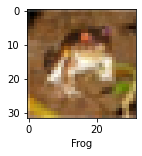

In [7]:
load_sample(X_train, y_train, 0)

In [8]:
# Scale the RGB value to 0-1
X_train = X_train / 255
X_test = X_test / 255

### Initial model without Convolutional NN for features extraction

In [9]:
ann = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32,32,3)),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='sigmoid') # Better use softmax for real
])

ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=8)

Epoch 1/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8701 - accuracy: 0.3296
Epoch 2/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6820 - accuracy: 0.3989
Epoch 3/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6060 - accuracy: 0.4248
Epoch 4/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5518 - accuracy: 0.4455
Epoch 5/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5172 - accuracy: 0.4582
Epoch 6/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4858 - accuracy: 0.4675
Epoch 7/8
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4602 - accuracy: 0.4777
Epoch 8/8
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4412 - accuracy: 0.4858


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

def gen_report(model, X, y_true):
    y_pred = model.predict(X)
    y_pred_classes = [np.argmax(prob) for prob in y_pred]
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))

In [11]:
gen_report(ann, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.65      0.53      0.58      1000
           2       0.35      0.38      0.36      1000
           3       0.33      0.34      0.33      1000
           4       0.39      0.43      0.41      1000
           5       0.43      0.30      0.35      1000
           6       0.45      0.63      0.52      1000
           7       0.60      0.46      0.52      1000
           8       0.58      0.65      0.61      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [21]:
loss, accuracy = ann.evaluate(X_test, y_test)
# Definitely not good

313/313 [==============================] - 2s 5ms/step - loss: 1.4677 - accuracy: 0.4796


### Model with convolutional layers

In [13]:
cnn = tf.keras.models.Sequential([
        #cnn
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
    
        #ann
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4495 - accuracy: 0.4808
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0891 - accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.9552 - accuracy: 0.6686
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8679 - accuracy: 0.6976
Epoch 5/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.7972 - accuracy: 0.7231
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7410 - accuracy: 0.7427
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6888 - accuracy: 0.7606
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6411 - accuracy: 0.7774
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5957 - accuracy: 0.7923
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [20]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9598 - accuracy: 0.6956


In [15]:
gen_report(cnn, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.90      0.70      0.79      1000
           2       0.71      0.50      0.59      1000
           3       0.46      0.61      0.53      1000
           4       0.62      0.73      0.67      1000
           5       0.60      0.64      0.62      1000
           6       0.85      0.66      0.74      1000
           7       0.81      0.71      0.76      1000
           8       0.72      0.88      0.79      1000
           9       0.71      0.83      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



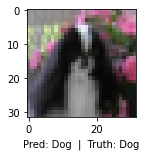

In [18]:
# Check our prediction
y_test = y_test.reshape(-1,)

y_pred = np.array([np.argmax(i) for i in cnn.predict(X_test)])
y_pred = y_pred.reshape(-1,)

load_sample(X_test, y_pred, 42, y_true=y_test)